In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline

import numpy as np
import seaborn as sns
from datetime import datetime
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers  # TF model
import shap as shap  # Visualizing tool
from scipy.stats import norm
from scipy import stats

In [ ]:
%store -r train_features
%store -r test_features

%store -r train_labels
%store -r test_labels

The tf.keras.layers.Normalization adding a feature normalization into the model.

Create the layer

In [68]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Fit the state of the preprocessing layer to the data

In [ ]:
normalizer.adapt(np.array(train_features))

Calculating the mean and variance, and storing them in the layer:

In [70]:
print(normalizer.mean.numpy())

first = np.array(train_features[:1])

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

[[    4.801   887.369   720.612     0.513     0.584 29315.254 22218.914]]
First example: [[   0 1440 1042    1    1   32 2124]]

Normalized: [[-0.09  1.16  0.23  0.98  0.84 -0.38 -0.19]]


# 3. REGRESSION WITH DEEP NEURAL NETWORK (single input)

The normalization layer

Two hidden, non-linear, Dense layers with the ReLU (relu) activation function nonlinearity.

A linear Dense single-output layer.

Mean Absolute Error

In [75]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'), #tanh
        layers.Dense(64, activation='relu'), #tanh
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Mean Squared Error

In [408]:
def build_and_compile_model(norm):
    model = keras.Sequential([
        norm,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_squared_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))
    return model

Creates a DNN model with only 'TotalViews' as input

In [76]:
dnn_totalviews_model = build_and_compile_model(totalviews_normalizer)

This model has quite a few more trainable parameters than the linear models:

In [77]:
dnn_totalviews_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


Train the model

In [78]:
history = dnn_totalviews_model.fit(
    train_features['TotalViews'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

Mean Absolute Error

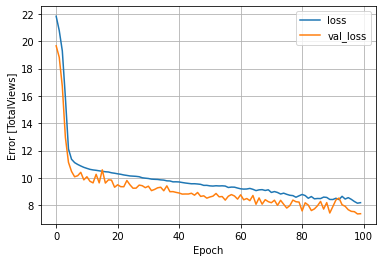

In [81]:
plot_loss(history)
plt.show()

Mean Squared Error

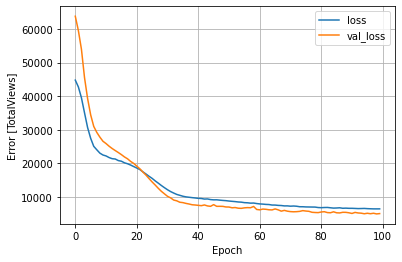

In [400]:
plot_loss(history)
plt.show()

In [90]:
x = tf.linspace(0.0, 5000000, 5000001)
y = dnn_totalviews_model.predict(x)

Mean Absolute Error

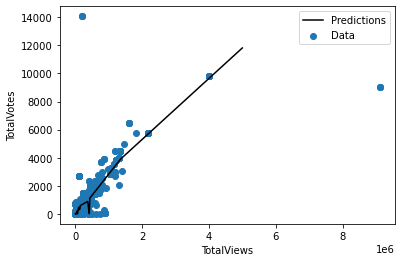

In [91]:
plot_totalviews(x, y)
plt.show()

Mean Squared Error

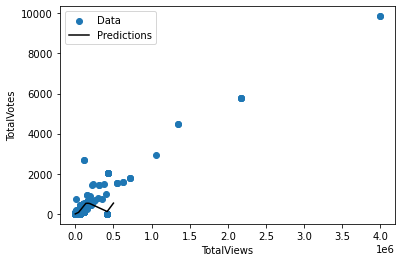

In [403]:
plot_totalviews(x, y)
plt.show()

Collecting the results for later.

Mean Absolute Error

In [92]:
test_results['dnn_totalviews_model'] = dnn_totalviews_model.evaluate(
    test_features['TotalViews'], test_labels,
    verbose=0)

Mean Squared Error

In [375]:
test_results_MSE['dnn_totalviews_model'] = dnn_totalviews_model.evaluate(
    test_features['TotalViews'], test_labels,
    verbose=0)